# Probabilidad e inferencia estadística

En el presente cuaderno se presentan algunos conceptos asociados con distribuciones de probabilidad discretas y continuas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set() # Visualización usando seaborn

## 1. Distribuciones de probabilidad discreta

### Ensayo de Bernoulli

Un ensayo de Bernoulli es aquel en que se puede obtener dos resultados: éxito o fracaso. Por ejemplo, se considera el lanzamiento de una moneda, donde cara es "éxito" y sello "Fracaso".

In [2]:
# Se crea una función para hacer lanzamientos de moneda o experimentos de Bernoulli

def bernoulli(n, p):
    """ n = Número de lanzamientos
        p = Probabilidad de éxito"""
    
    n = int(n)
    x = 0                # Contador para el número de éxitos
    for i in range(n):
        a = np.random.random()
        if a > p:
            x += 0
        else:
            x += 1
    return x

# Función para la "función empírica de distribución acumulada"

def ecdf(data):
    n = len(data)
    x = np.sort(data)           # Observaciones ordenadas
    y = np.arange(1,n+1)/n      
    return x,y

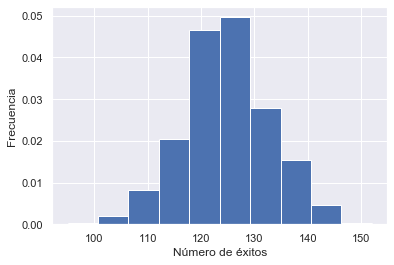

In [3]:
np.random.seed(42)
exitos = np.empty(1000)

# Se realiza mil veces el experimento de lanzar 250 veces una moneda

for i in range(1000):
    exitos[i] = bernoulli(250,0.5)
    
plt.hist(exitos, density=True);
plt.xlabel("Número de éxitos")
plt.ylabel("Frecuencia")
plt.show()    

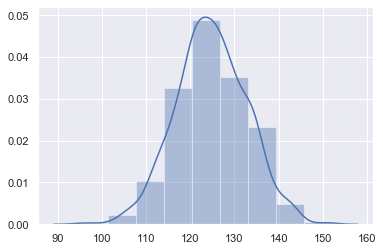

In [4]:
sns.distplot(exitos,bins=9);

El lanzamiento de una moneda en reptidas ocasiones y evaluar el números de éxitos y fracasos corresponde a una distribución binomial. La distribución binomial determian la relación que existe entre el número de éxitos y fracaso en un experimento y su respectiva probabilidad de ocurrencia (p= probabilidad de éxito)

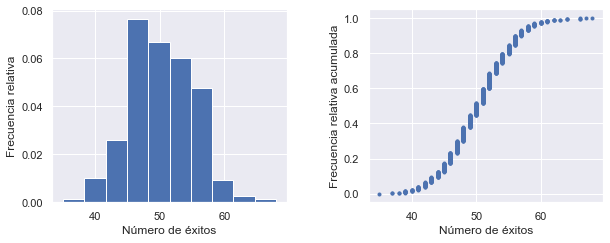

In [5]:
# Continuando con el lanzamiento de las monedas

cara = np.random.binomial(100,0.5,1000)  # Un experimento consiste en lanzar 100 veces una moneda, la prob de cara es 0.5 y se repite mil veces
x, y = ecdf(cara)

plt.figure(figsize=(9,4))    # Dimensiones de la figura

# Gráfico 1
plt.subplot(1,2,1)
plt.hist(cara,density=True)
plt.xlabel("Número de éxitos")
plt.ylabel("Frecuencia relativa")

# Gráfico 2
plt.subplot(1,2,2)
plt.plot(x, y, marker=".",linestyle="none")
plt.xlabel("Número de éxitos")
plt.ylabel("Frecuencia relativa acumulada")

plt.subplots_adjust(top=0.75,bottom=0.08,left=0.1,right=0.95,
                   hspace=0.35,wspace=0.35);

## 2. Distribuciones de probabilidad continua 

### Distribución de probabilidad normal

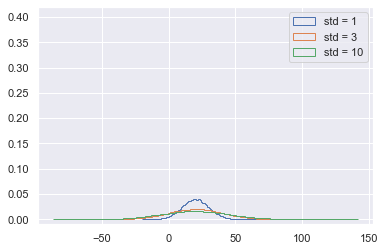

In [3]:
# Tomar 3 muestras con diferentes desviaciones estándar

samples_std1 = np.random.normal(20,10,100000)
samples_std3 = np.random.normal(20,20,100000)
samples_std10 = np.random.normal(20,25,100000)

# Construir los histogramas

plt.hist(samples_std1, bins=100, density=True, histtype="step")
plt.hist(samples_std3, bins=100, density=True, histtype="step")
plt.hist(samples_std10, bins=100, density=True, histtype="step")

# Asignar etiquetas y visualizar los diagramas

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


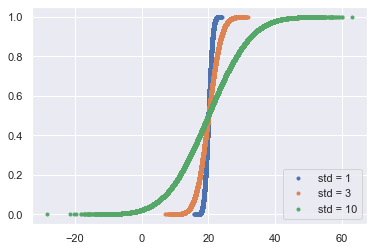

In [7]:
# Distribución acumulada

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Diagramar la visualización
plt.plot(x_std1, y_std1, marker=".", linestyle="none")
plt.plot(x_std3, y_std3, marker=".", linestyle="none")
plt.plot(x_std10, y_std10, marker=".", linestyle="none")

# Asignar etiquetas y mostrar el gráfico

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


### Ejemplo: 
Verificar si una muestra sigue una distribución de probabilidad normal. En este caso el ataque de los pokemon

In [8]:
df = pd.read_csv("Pokemon.csv",index_col=0)

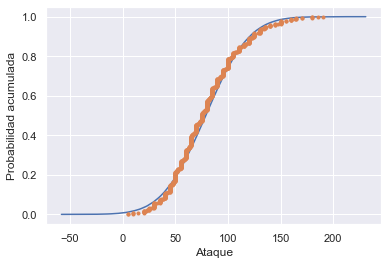

In [9]:
attack = df.Attack

mu = np.mean(attack)
sigma = np.std(attack)
sample = np.random.normal(mu, sigma, 100000)

x, y = ecdf(attack)
x_the, y_the = ecdf(sample)

plt.plot(x_the, y_the)
plt.plot(x, y, marker=".", linestyle="none")
plt.ylabel("Probabilidad acumulada")
plt.xlabel("Ataque")
plt.show()


### Distribución de probabilidad exponencial

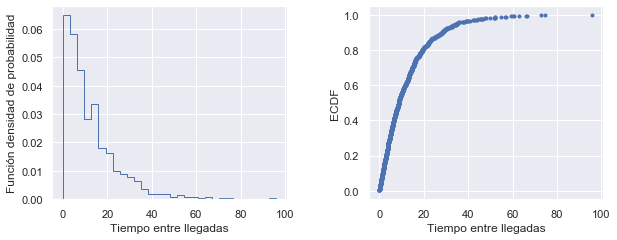

In [10]:
data = np.random.exponential(12,1000)

x, y = ecdf(data)

plt.figure(figsize=(9,4))    # Dimensiones de la figura

# Gráfico 1
plt.subplot(1,2,1)
plt.hist(data,bins=30,density=True,histtype="step")
plt.xlabel("Tiempo entre llegadas")
plt.ylabel("Función densidad de probabilidad")

# Gráfico 2
plt.subplot(1,2,2)
plt.plot(x, y, marker=".",linestyle="none")
plt.xlabel("Tiempo entre llegadas")
plt.ylabel("ECDF")

plt.subplots_adjust(top=0.75,bottom=0.08,left=0.1,right=0.95,
                   hspace=0.35,wspace=0.35);